# Re-make $dC_\ell/dw_0$, $dC_\ell/dw_a$ using $P(z,k;w)g(z,k;w,\Delta w)$

In [33]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [34]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



Fobj2 = pickle.load(filehandler_lin) 
Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP
print lminP,lmaxP

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [35]:
# get copies of the derivatives from the objects
crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
dClVecs2 = np.copy(Fobj2.dClVecs)
dClVecsP2 = np.copy(Fobj2.dClVecsP)

crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)
crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)
dClVecs4 = np.copy(Fobj4.dClVecs)
dClVecsP4 = np.copy(Fobj4.dClVecsP)

print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

print crossClsPPlus2.shape,crossClsPPlus4.shape
print crossClsPMinus2.shape,crossClsPMinus4.shape
print dClVecsP2.shape, dClVecsP4.shape

(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)


In [36]:
nMapsP = 2 # should match above

# Re-make w derivatives

In [37]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
print 'get nonlinear P(k)...'
myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [38]:
print Fobj2.dndzMode,Fobj4.dndzMode
print Fobj2.nonlinear,Fobj4.nonlinear

2 2
False True


In [39]:
print paramList
print paramList[7:9]
for cParamNum in range(7,9):
    print paramList[cParamNum]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['w', 'wa']
w
wa


In [40]:
# grab some code from FisherCl
tophatBins = True
AccuracyBoost = 3
lpa = 5.0 # set_for_lmax also sets lensing 
#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0
    

print 'creating modified parameter lists . . . '
myParams = Fobj2.cosParams
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
  # add parameter dictionary to lists; HAVE TO BE COPIES!!!
  myParamsUpper.append(myParams.copy())
  myParamsLower.append(myParams.copy())
  # modify parameter number cParamNum in ditionaries
  myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
  myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]


creating modified parameter lists . . . 


In [41]:
# load data needed for P(z,k) scaling
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_ratio.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_ratio.npy')
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_avg_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('dw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dwa_avg_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('g_0_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('g_a_ex.npy')
myZs, myKs, dPdw0_ratio = np.load('dPdw0_ex.npy')
myZs, myKs, dPdwa_ratio = np.load('dPdwa_ex.npy')
print 'done.'

done.


In [42]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
dPdw0_interp = RectBivariateSpline(myZs,myKs,dPdw0_ratio)
dPdwa_interp = RectBivariateSpline(myZs,myKs,dPdwa_ratio)

print 'done.'

done.


In [43]:
print paramList[7]

w


In [ ]:
# re-make derivatives
#dClVecs2[mapIdx, pIdx]
#dClVecs4[mapIdx, pIdx]


# Compare old and new derivative versions

In [54]:
nToPlot = 17 # kk and kg at beginning of array

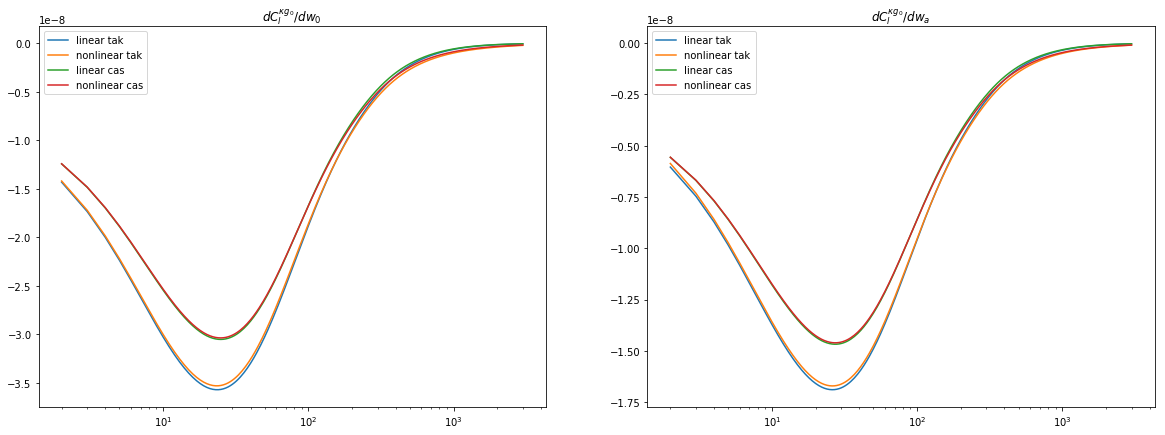

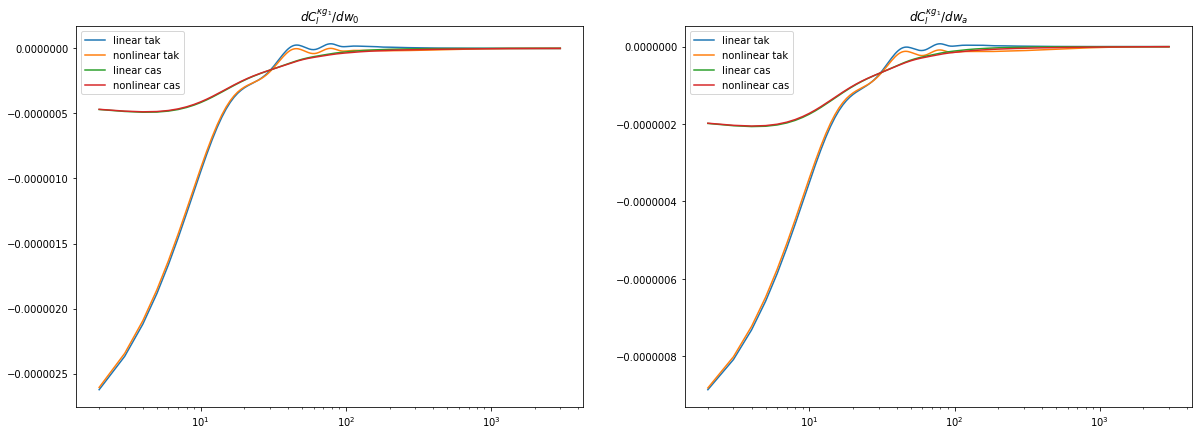

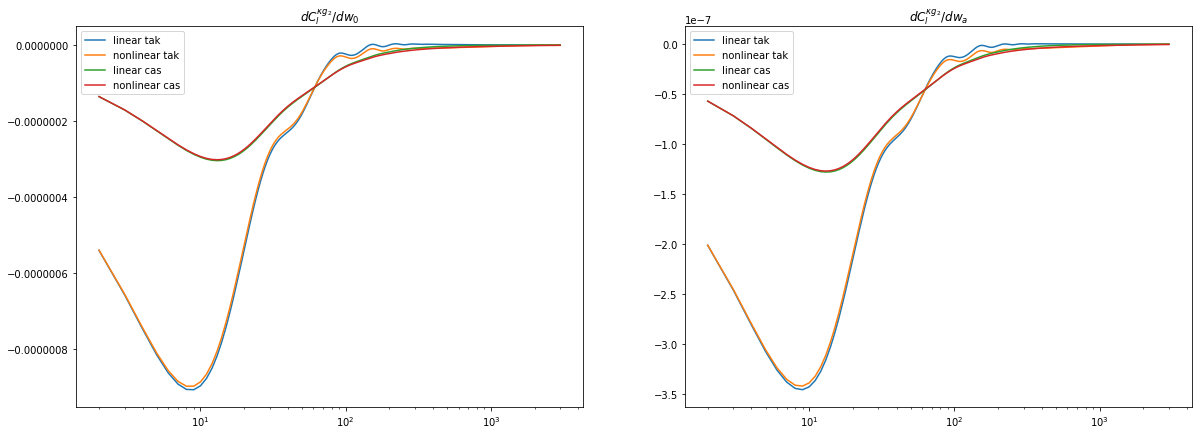

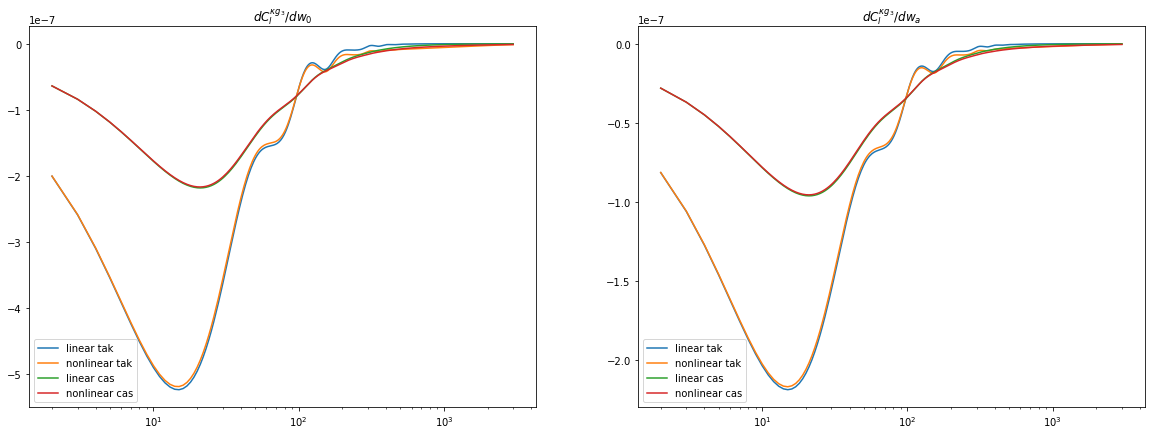

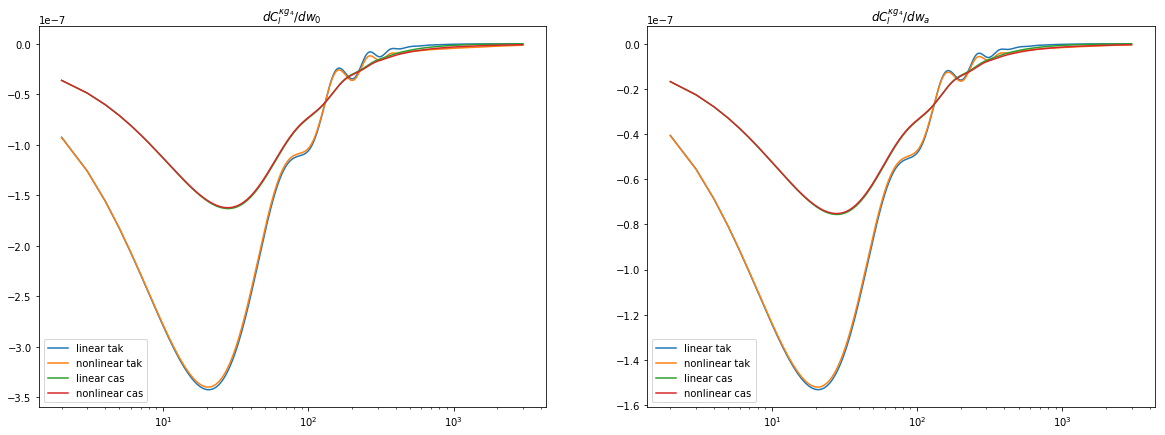

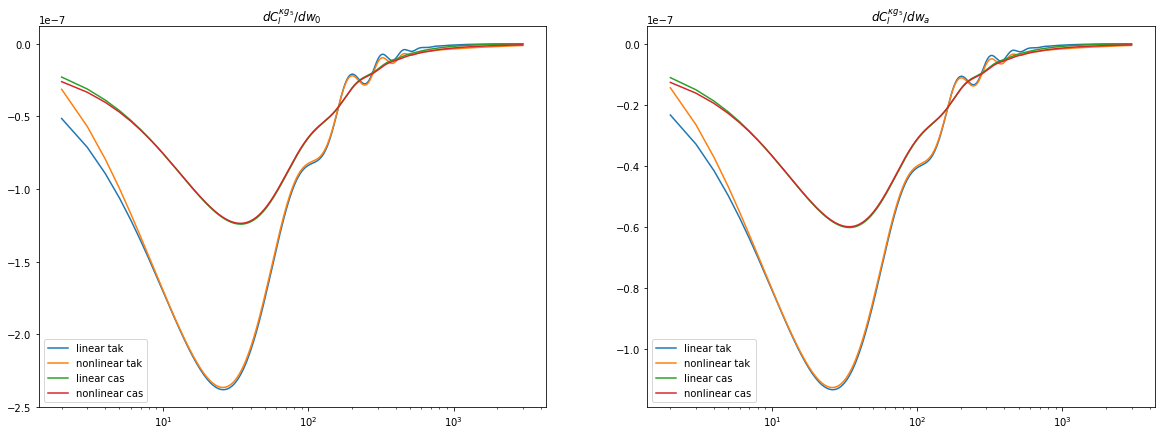

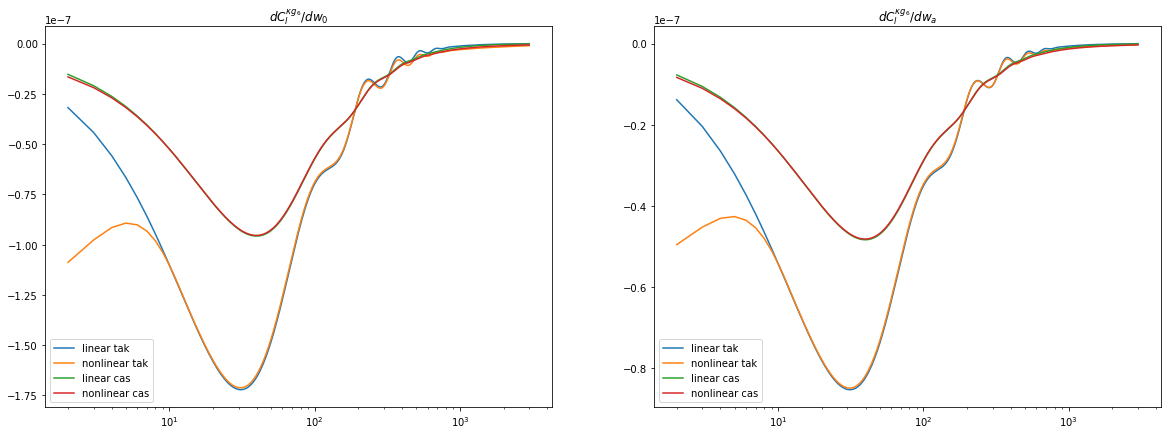

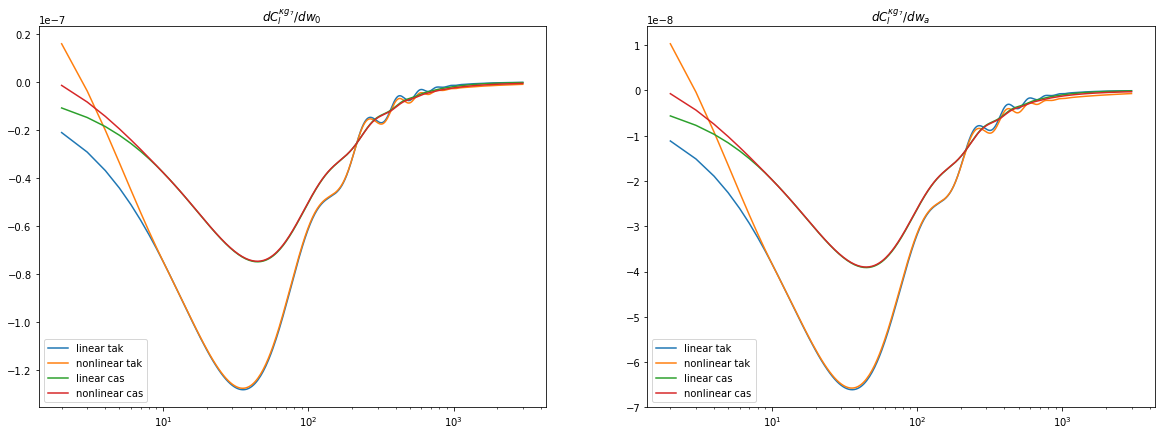

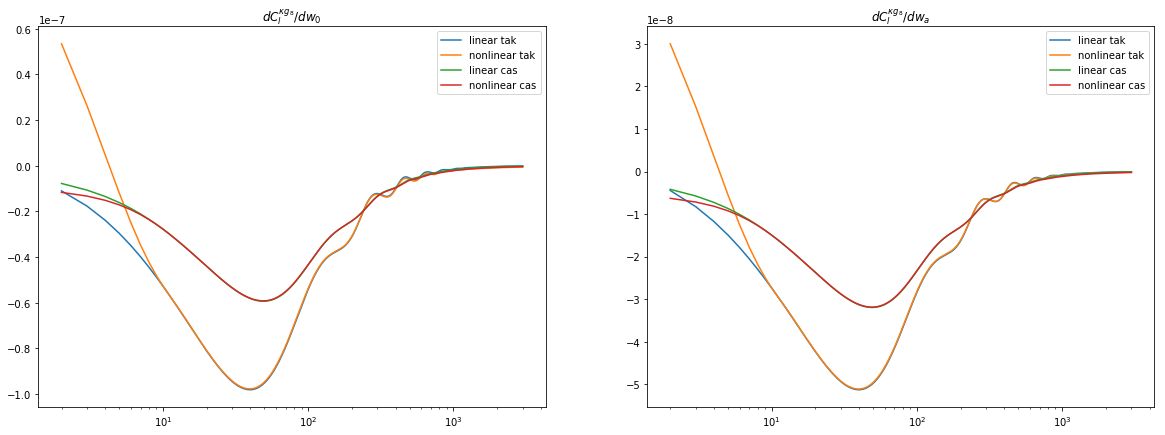

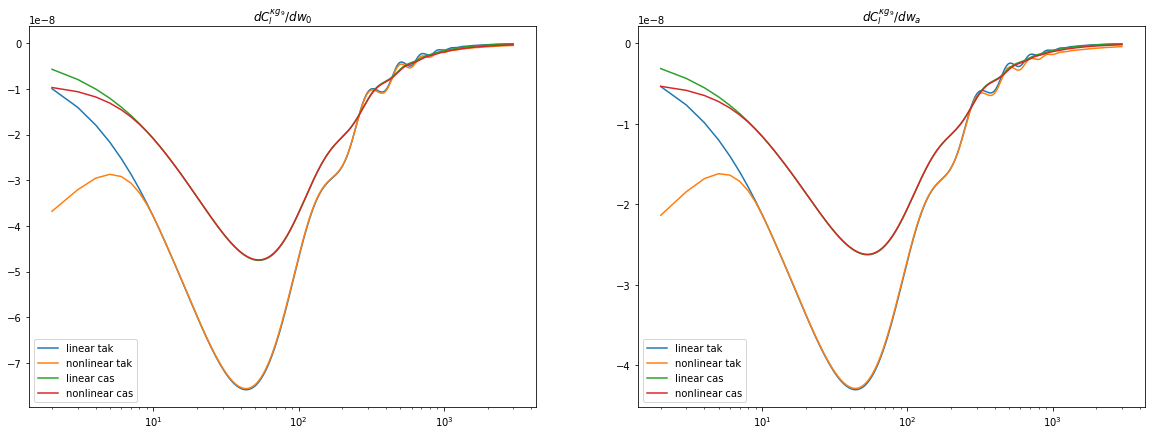

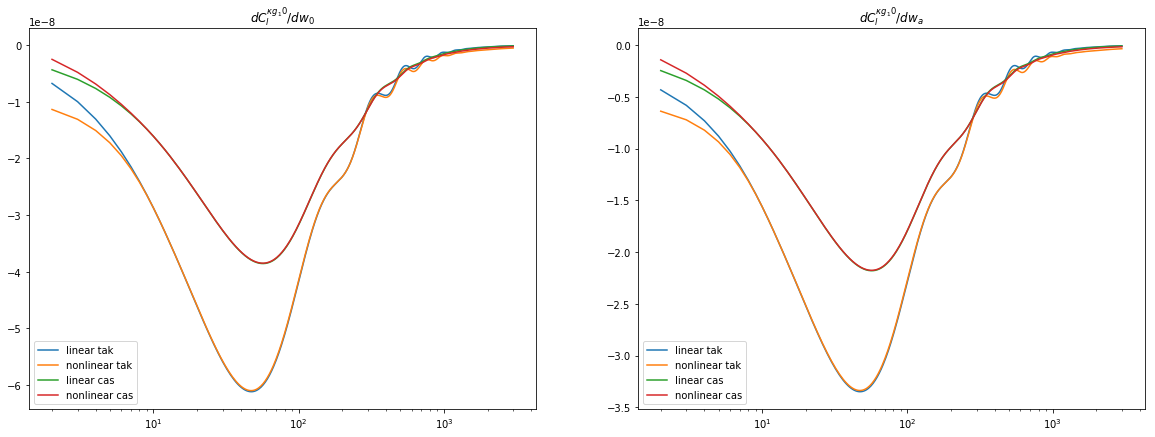

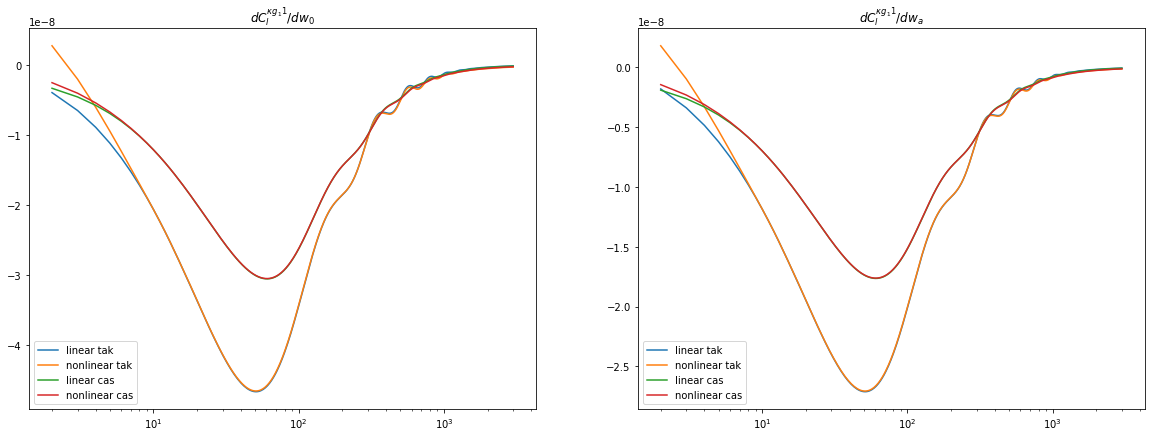

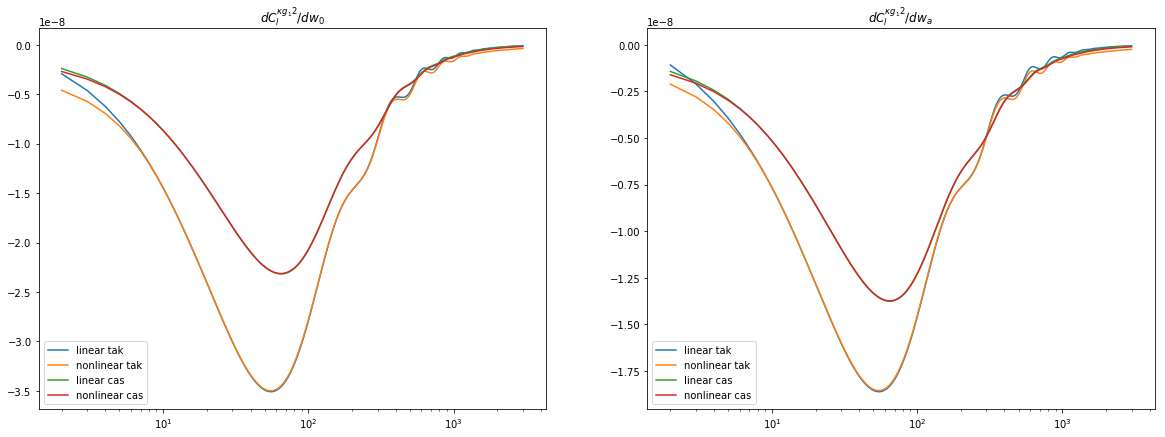

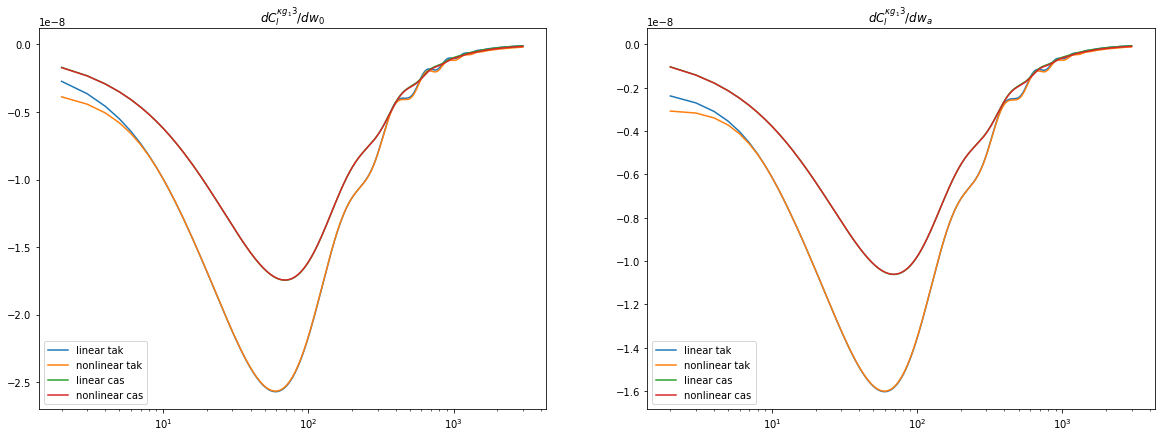

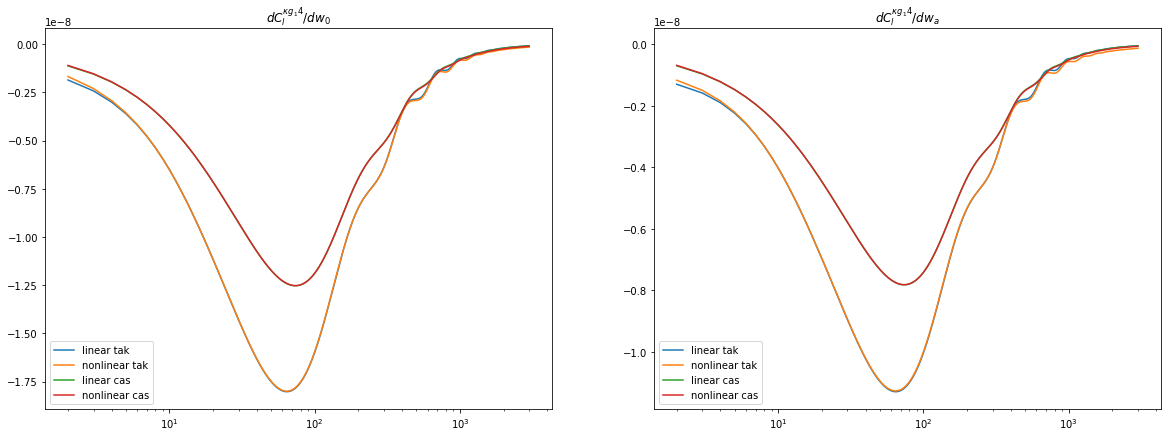

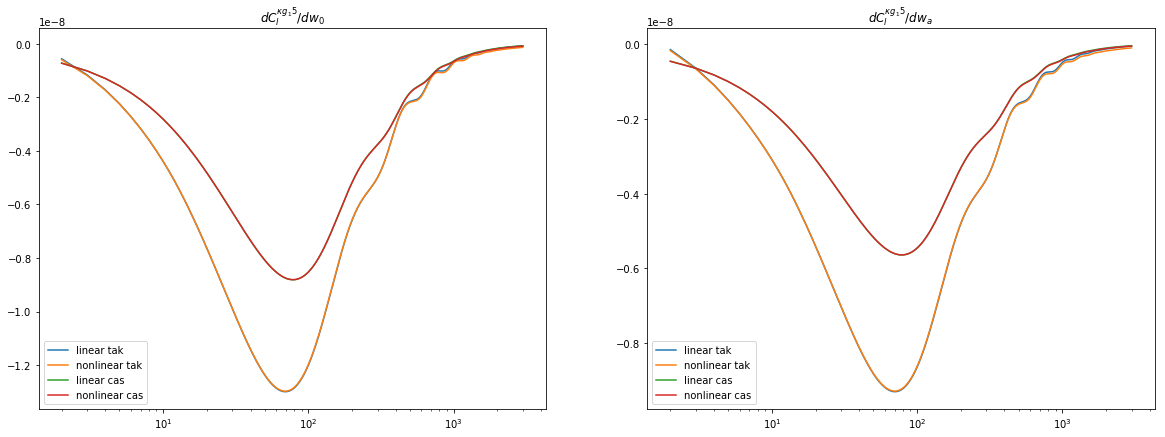

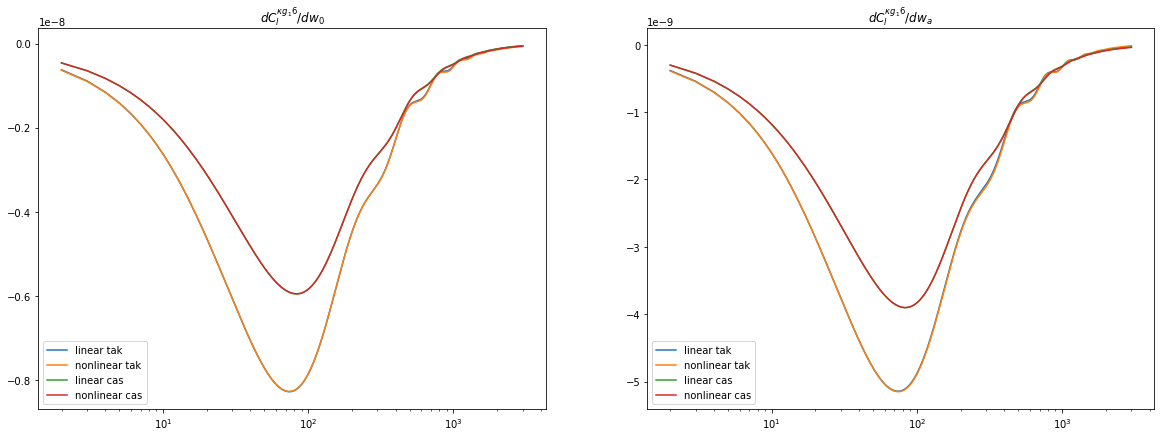

In [55]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

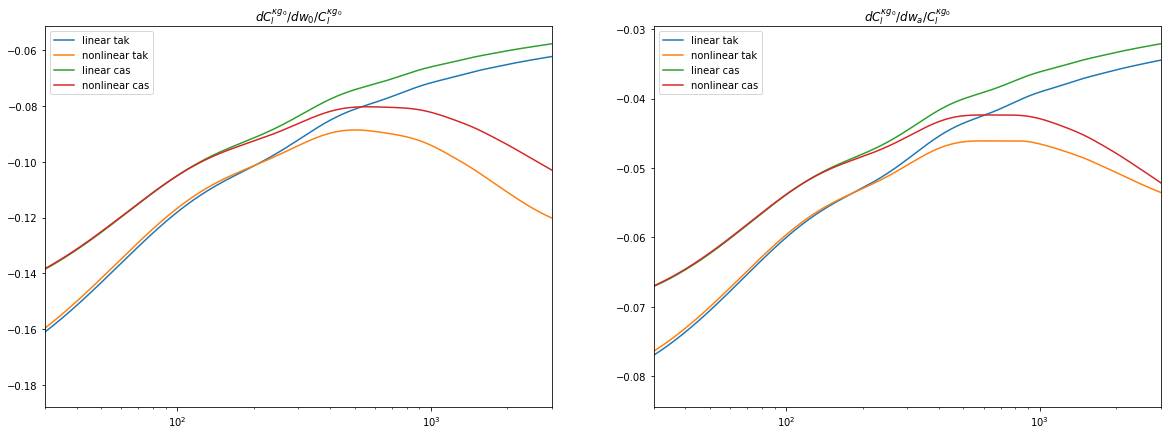

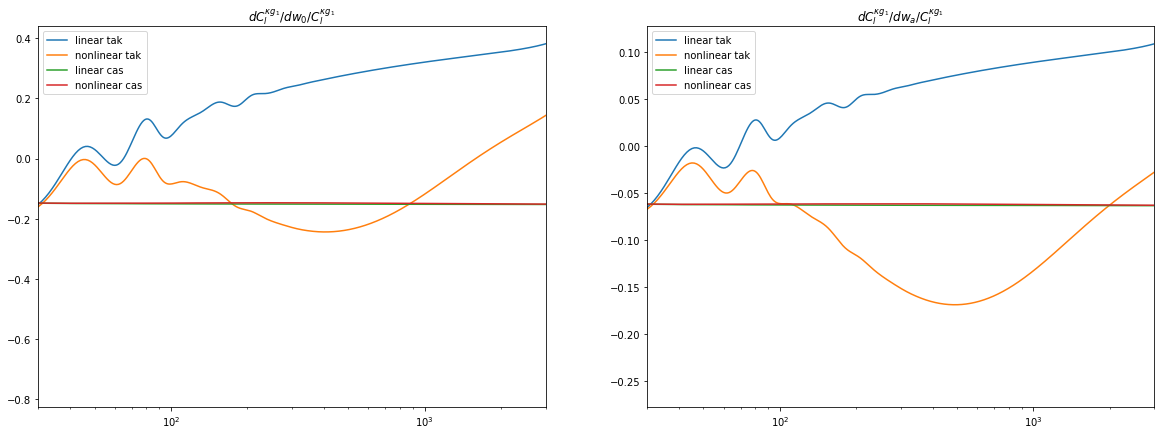

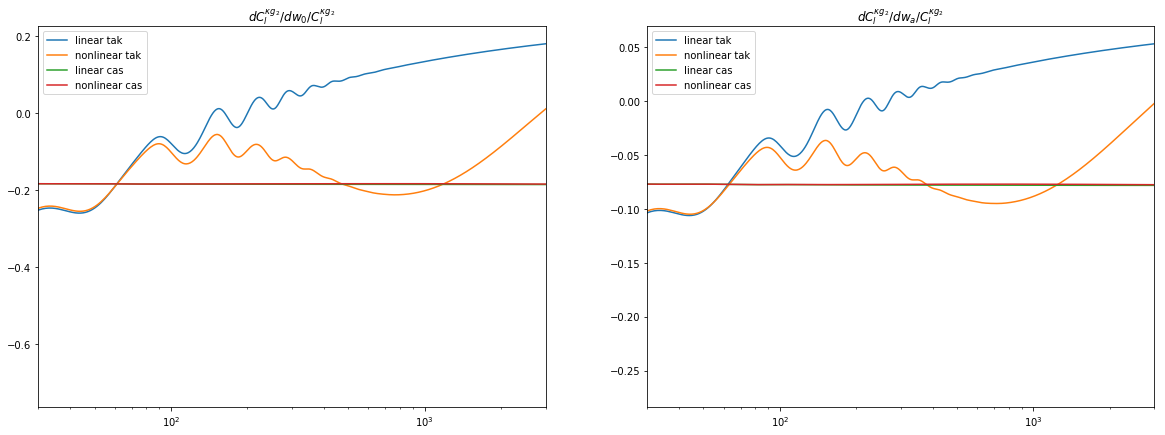

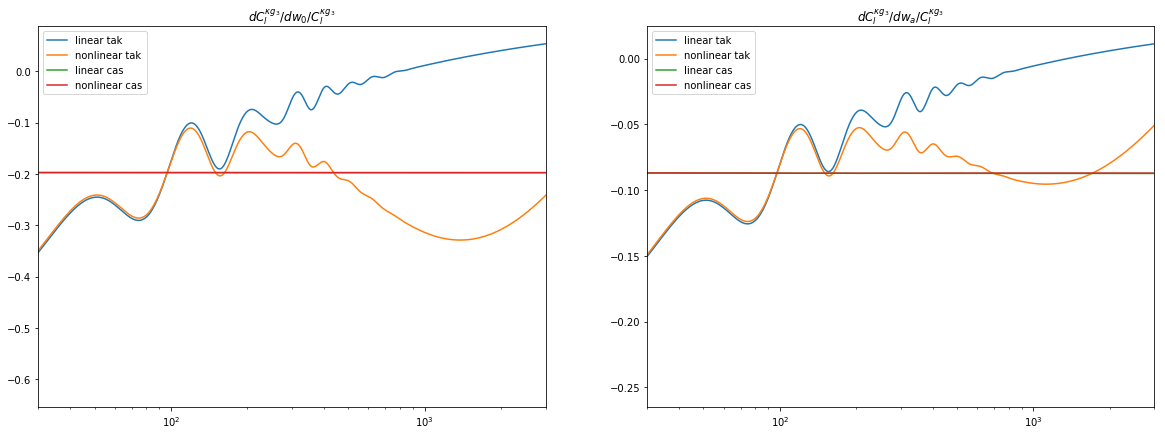

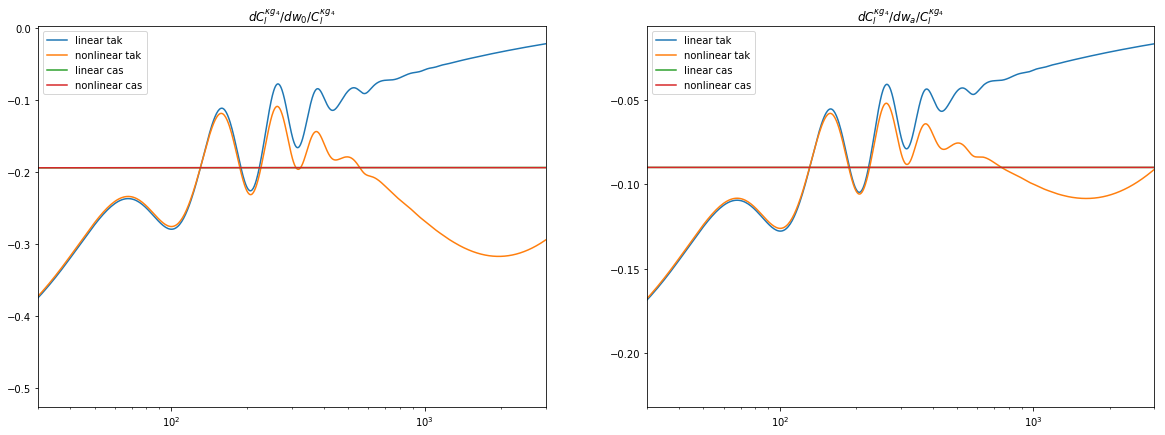

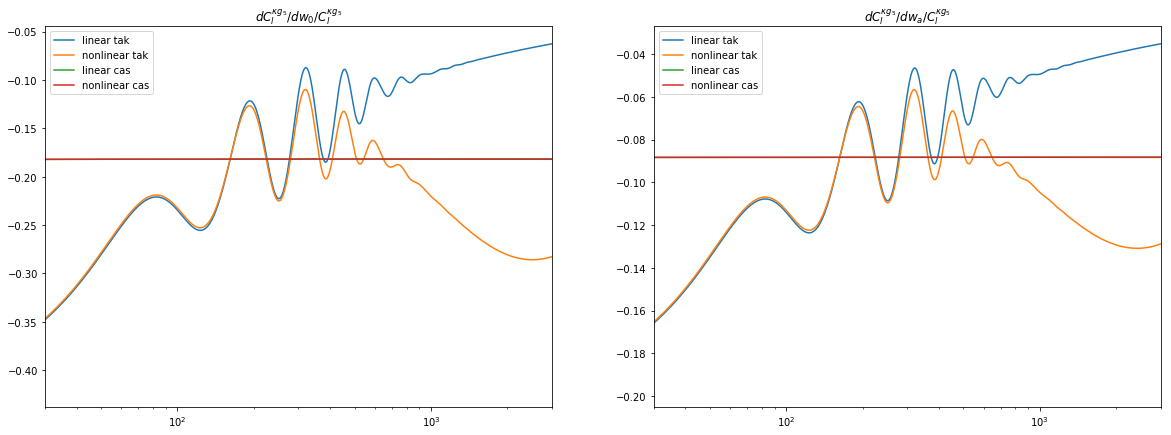

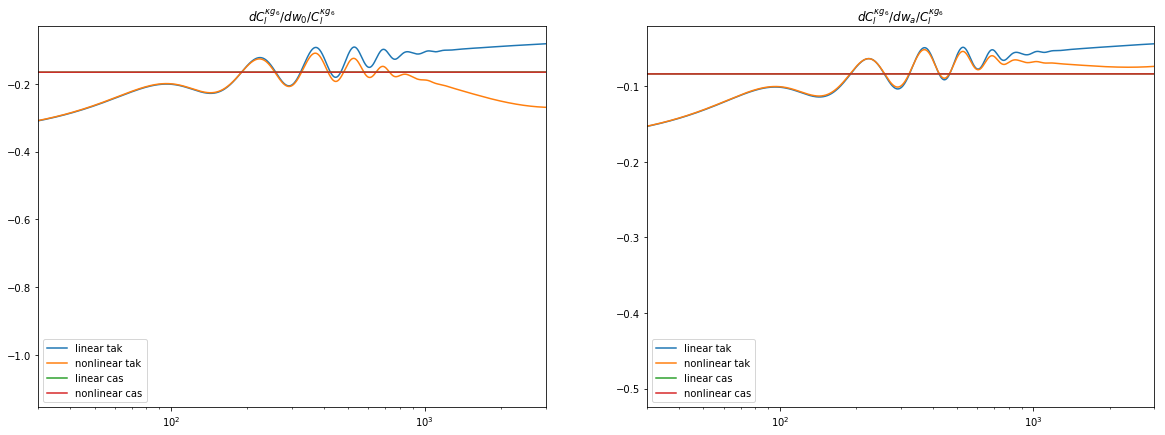

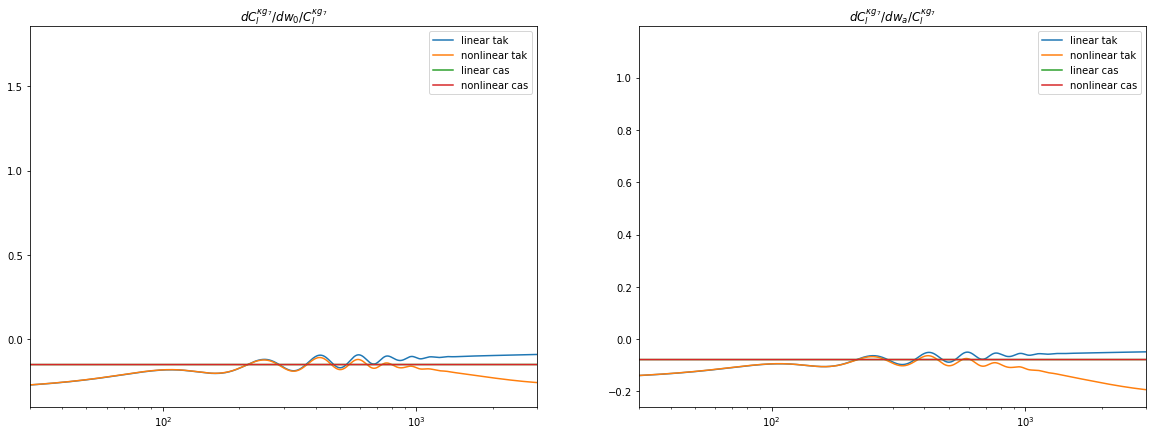

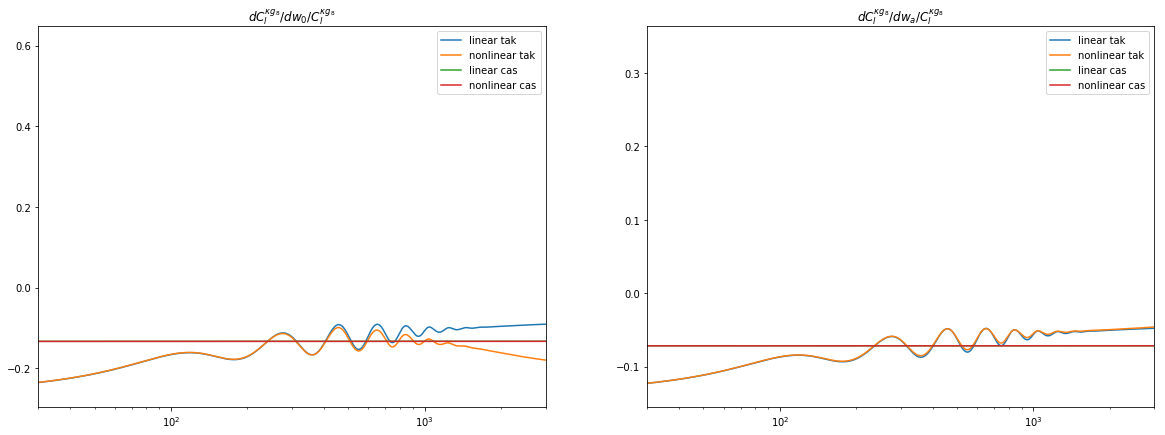

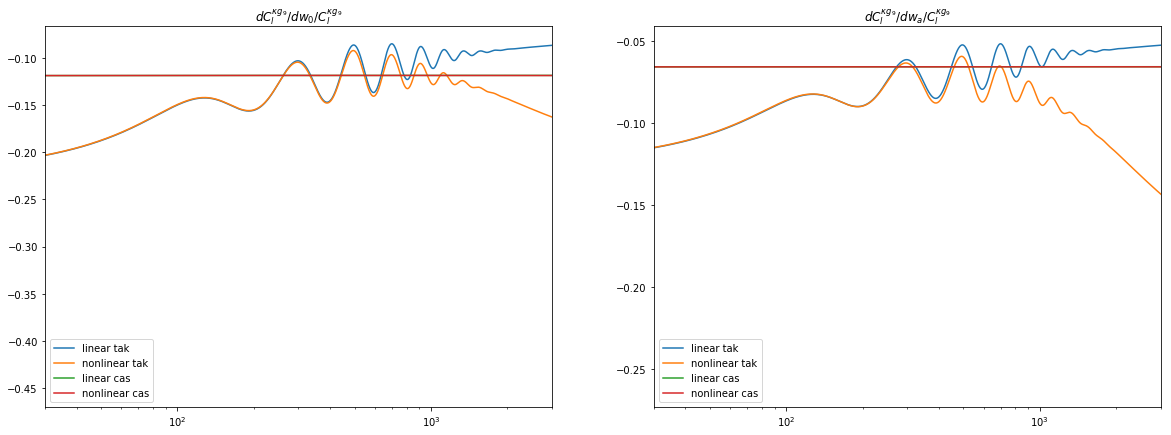

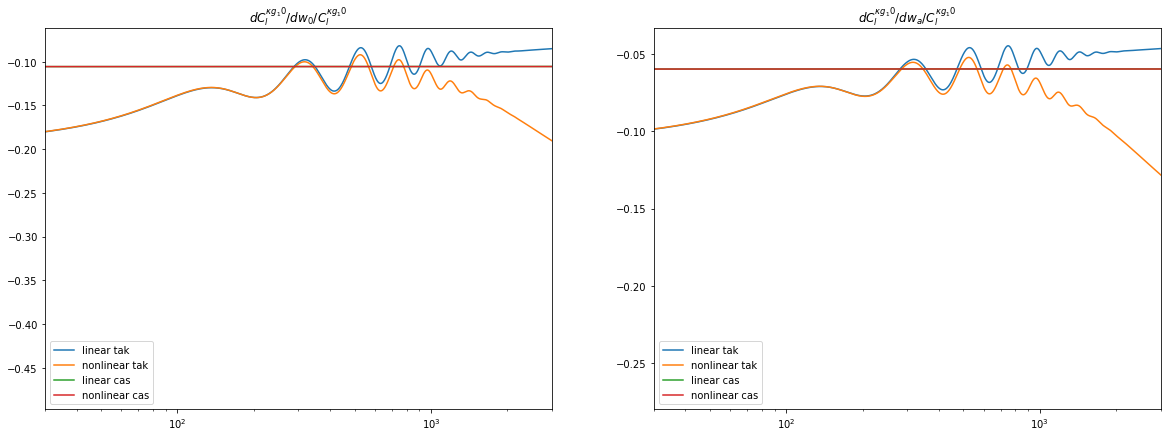

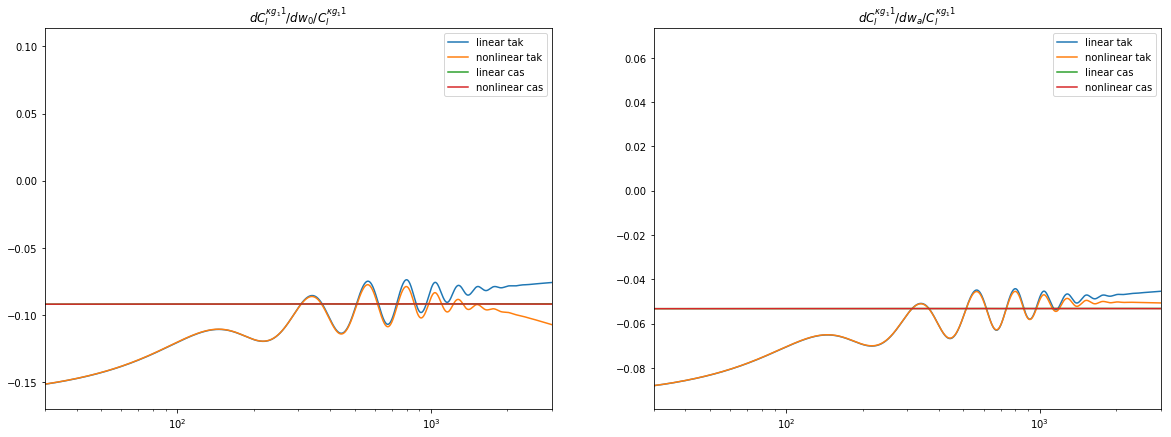

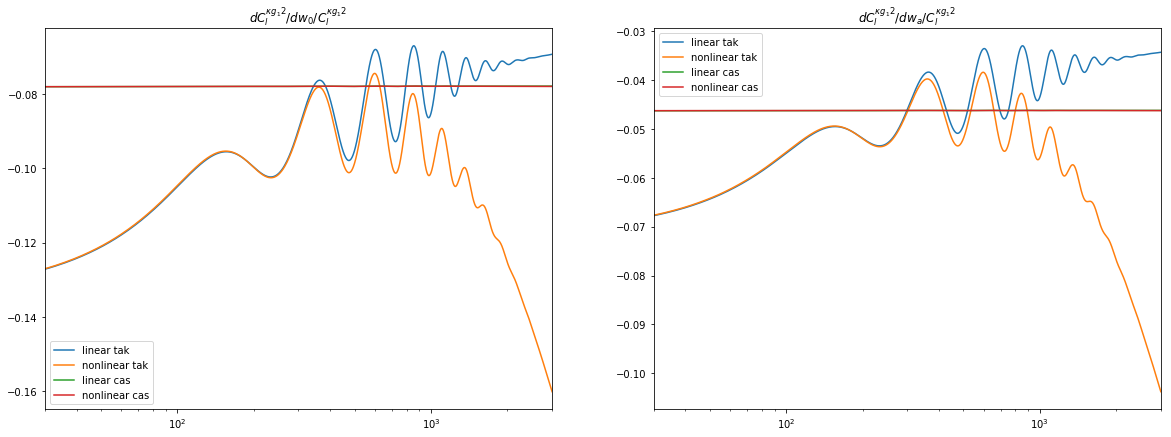

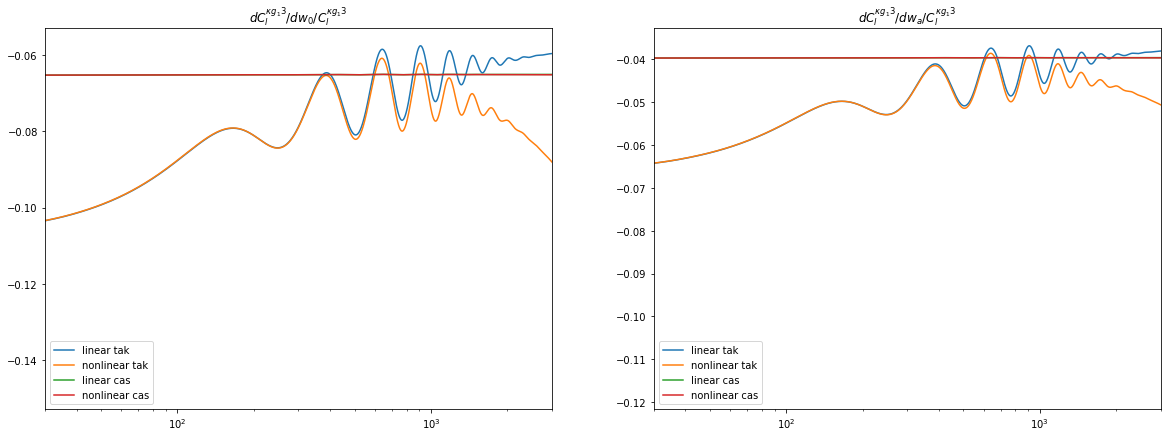

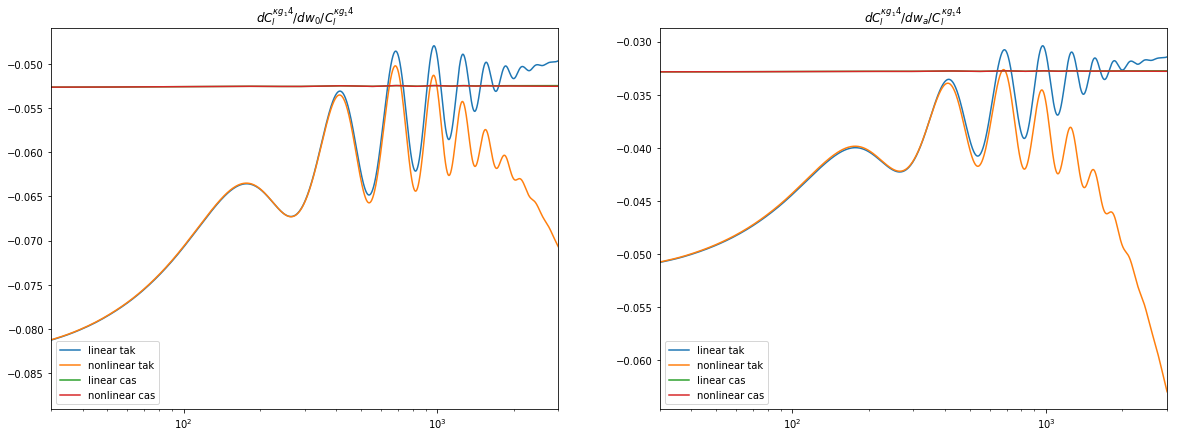

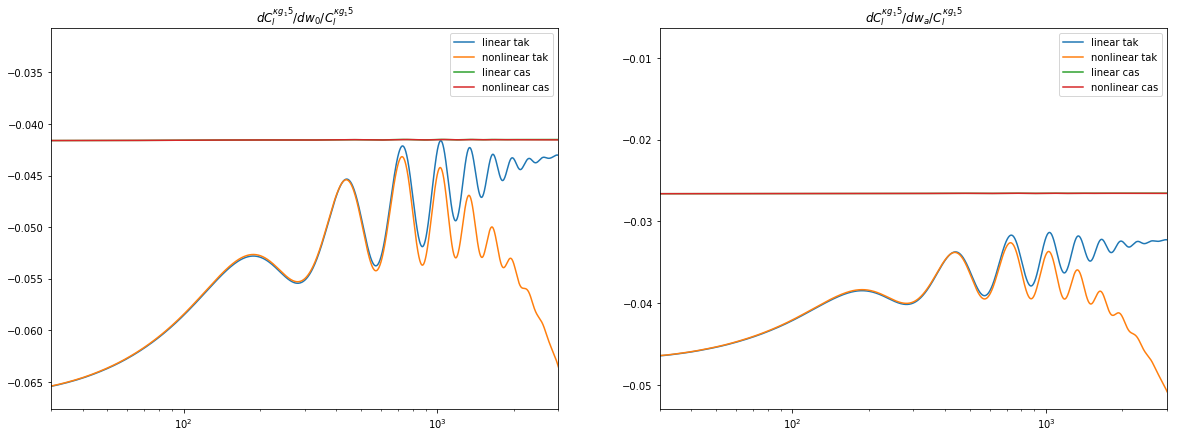

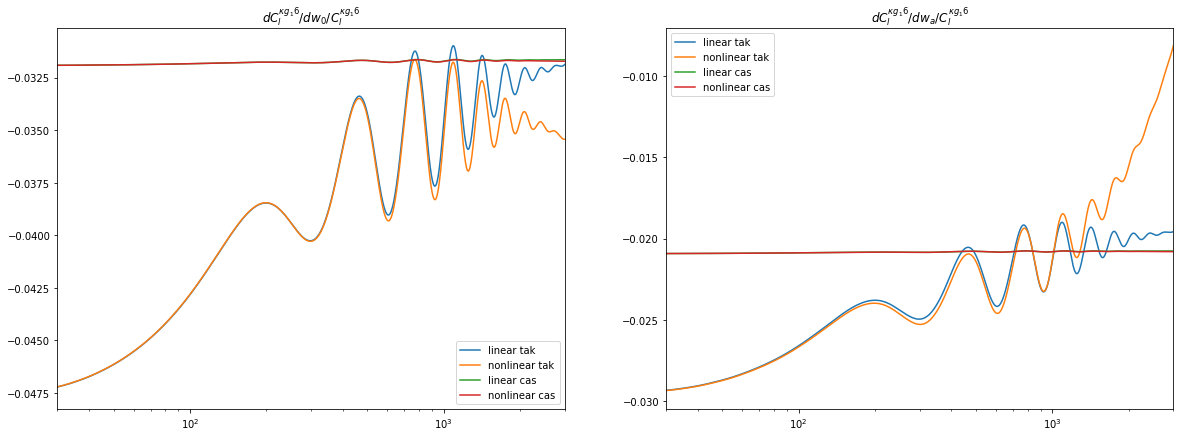

In [56]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

In [57]:
# get sigmas from original Fobjs to compare against
Fijkg2 = Fobj2.makeFisher(30)
FijTE2 = Fobj2.makeFisher(30,TE=True)
Fijkg4 = Fobj4.makeFisher(30)
FijTE4 = Fobj4.makeFisher(30,TE=True)
print 'done.'

done.


In [58]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_kg2 = getSigmas(Fijkg2)
sigmas_TE2 = getSigmas(FijTE2)
sigmas_kg4 = getSigmas(Fijkg4)
sigmas_TE4 = getSigmas(FijTE4)
print 'done.'

done.


In [59]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.crossClsPlus = np.copy(crossClsPlus2)
Fobj2.crossClsMinus = np.copy(crossClsMinus2)
Fobj2.crossClsPPlus = np.copy(crossClsPPlus2)
Fobj2.crossClsPMinus = np.copy(crossClsPMinus2)
Fobj2.dClVecs = np.copy(dClVecs2)
Fobj2.dClVecsP = np.copy(dClVecsP2)

Fobj4.crossClsPlus = np.copy(crossClsPlus4)
Fobj4.crossClsMinus = np.copy(crossClsMinus4)
Fobj4.crossClsPPlus = np.copy(crossClsPPlus4)
Fobj4.crossClsPMinus = np.copy(crossClsPMinus4)
Fobj4.dClVecs = np.copy(dClVecs4)
Fobj4.dClVecsP = np.copy(dClVecsP4)

Fobj2.Fij = Fobj2.makeFisher(30)
Fobj2.FijTE = Fobj2.makeFisher(30,TE=True)
Fobj4.Fij = Fobj4.makeFisher(30)
Fobj4.FijTE = Fobj4.makeFisher(30,TE=True)


sigmas_kg2_new = getSigmas(Fobj2.Fij)
sigmas_TE2_new = getSigmas(Fobj2.FijTE)
sigmas_kg4_new = getSigmas(Fobj4.Fij)
sigmas_TE4_new = getSigmas(Fobj4.FijTE)
print 'done.'


done.


In [60]:
# ack. singular matrix
print Fobj2.Fij

[[ 5.48322831e+09 -4.64326214e+09  8.74773834e+09 -1.41156504e+17
  -6.01833622e+08  5.19290548e+05  1.52959432e+08  4.52621726e+07
   2.22077378e+07 -2.58715608e+07 -4.13361068e+07 -4.05106302e+07
  -3.60788538e+07 -3.13910220e+07 -2.73930260e+07 -2.37828884e+07
  -2.02861530e+07 -1.70324973e+07 -1.39403586e+07 -1.04131667e+07
  -6.51714028e+06 -3.27607695e+06 -1.03550402e+06 -1.77650512e+05
  -1.52101991e+04]
 [-4.64326214e+09  3.94174128e+09 -8.32907051e+09  1.19324165e+17
   5.11784545e+08 -4.39082252e+05 -1.29108610e+08 -3.83538678e+07
  -1.87903558e+07  2.26844308e+07  3.58023344e+07  3.46121830e+07
   3.06264993e+07  2.65186170e+07  2.29821405e+07  1.98821563e+07
   1.69850330e+07  1.41779485e+07  1.15815679e+07  8.61756588e+06
   5.36389874e+06  2.69625322e+06  8.53682907e+05  1.46874122e+05
   1.31423288e+04]
 [ 8.74773834e+09 -8.32907051e+09  2.45581410e+11 -7.24261870e+16
  -1.28285353e+09  3.02713537e+05  4.17747378e+07  4.39171992e+07
   1.61451984e+07 -1.69542716e+08 -1.7

In [61]:
# ack. singular matrix
print Fobj4.Fij

[[ 6.57000024e+09 -5.19721767e+09 -5.63336787e+10 -2.23277413e+17
  -4.26849925e+08  2.51754745e+05  2.35828731e+08  5.37925875e+07
   2.62738323e+07 -3.36900848e+07 -5.29283945e+07 -5.12440103e+07
  -3.91283773e+07 -3.87031267e+07 -3.01020342e+07 -2.56387880e+07
  -2.51906424e+07 -2.06198721e+07 -1.55305544e+07 -1.19792046e+07
  -7.44292496e+06 -3.64781983e+06 -1.12620577e+06 -1.86050237e+05
  -1.56444964e+04]
 [-5.19721767e+09  4.15886512e+09  4.40225236e+10  1.77850990e+17
   3.40999811e+08 -2.00470496e+05 -1.88380180e+08 -4.27444664e+07
  -2.08804737e+07  3.57204463e+07  3.78964087e+07  3.65304715e+07
   3.40753947e+07  2.75686231e+07  2.49358795e+07  2.18843579e+07
   1.87481400e+07  1.58202872e+07  1.28676031e+07  9.73688578e+06
   5.92856564e+06  2.95533119e+06  9.08738686e+05  1.52504064e+05
   1.34089523e+04]
 [-5.63336787e+10  4.40225236e+10  9.80851906e+11  2.23559681e+18
   4.36297353e+09 -1.96278942e+06 -2.56946925e+09 -5.75526362e+08
  -2.69739067e+08  8.67085253e+08  8.1

In [62]:
# print comparisons
from prettytable import PrettyTable
paramList = Fobj2.paramList

print 'kg linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2[i]
    Bi = sigmas_kg2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4[i]
    Bi = sigmas_kg4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_TE2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_TE4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

kg linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    0.000741   |  0.000742  |      0.11     |
|     omch2     |    0.00205    |  0.00228   |      10.8     |
| cosmomc_theta |    2.91e-05   |  3.28e-05  |      12.6     |
|       As      |    2.78e-11   |  2.61e-11  |     -5.81     |
|       ns      |    0.00261    |  0.00333   |      27.8     |
|      tau      |      6.75     |    8.87    |      31.4     |
|      mnu      |     0.0391    |   0.0472   |      20.6     |
|       w       |     0.0784    |   0.297    |       279     |
|       wa      |     0.226     |   0.648    |       187     |
|      bin1     |    0.00525    |   0.0108   |       105     |
|      bin2     |    0.00497    |   0.0128   |       157     |
|      bin3     |    0.00552    |   0.0136   |       146     |
|      bin4     |    0.00637    |   0.0134   

In [63]:
# check combined kgTE
def getFijSum(Fijkg,FijTE,nCosParams):
    FijSum = np.copy(Fijkg)
    FijSum[:nCosParams,:nCosParams] += np.copy(FijTE)
    return FijSum

FijSum2 = getFijSum(Fijkg2,FijTE2,nCosParams)
FijSum2_new = getFijSum(Fobj2.Fij,Fobj2.FijTE,nCosParams)
FijSum4 = getFijSum(Fijkg4,FijTE4,nCosParams)
FijSum4_new = getFijSum(Fobj4.Fij,Fobj4.FijTE,nCosParams)

sigmas_sum2 = getSigmas(FijSum2)
sigmas_sum2_new = getSigmas(FijSum2_new)
sigmas_sum4 = getSigmas(FijSum4)
sigmas_sum4_new = getSigmas(FijSum4_new)
print 'done.'

done.


In [64]:
print 'kgTE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2[i]
    Bi = sigmas_sum2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4[i]
    Bi = sigmas_sum4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.07e-06  |     -1.38     |
|     omch2     |    0.000199   |  0.00021   |      5.17     |
| cosmomc_theta |    2.78e-07   |  2.91e-07  |      4.64     |
|       As      |    1.42e-11   |  1.41e-11  |     -0.519    |
|       ns      |    0.000787   |  0.000854  |      8.57     |
|      tau      |    0.00359    |  0.00349   |      -2.9     |
|      mnu      |     0.0194    |   0.0183   |     -5.44     |
|       w       |     0.055     |   0.225    |       309     |
|       wa      |     0.141     |    0.46    |       227     |
|      bin1     |    0.00244    |  0.00612   |       151     |
|      bin2     |    0.00264    |  0.00754   |       186     |
|      bin3     |    0.00321    |  0.00795   |       148     |
|      bin4     |    0.00365    |  0.00763 

In [65]:
# Save the modified Fisher Objects

filehandler_lin = open('Fisher_7_16Opzk_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_lin = open('Fisher_7_16O_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16Mpzk_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_nln = open('Fisher_7_16M_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



pickle.dump(Fobj2,filehandler_lin)
pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
filehandler_nln.close()
print 'done.'


done.


In [66]:
# check affect of fixing wa
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
waIndex = 8

FijSum2_nowa = fixParam(FijSum2,waIndex)
FijSum2_new_nowa = fixParam(FijSum2_new,waIndex)
FijSum4_nowa = fixParam(FijSum4,waIndex)
FijSum4_new_nowa = fixParam(FijSum4_new,waIndex)

sigmas_sum2_nowa = getSigmas(FijSum2_nowa)
sigmas_sum2_new_nowa = getSigmas(FijSum2_new_nowa)
sigmas_sum4_nowa = getSigmas(FijSum4_nowa)
sigmas_sum4_new_nowa = getSigmas(FijSum4_new_nowa)
print 'done.'

done.


In [67]:
paramList = np.delete(paramList,waIndex)
print paramList

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'bin1' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


In [68]:
print 'kgTE linear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2_nowa[i]
    Bi = sigmas_sum2_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4_nowa[i]
    Bi = sigmas_sum4_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear, wa fixed
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.04e-06  |     -1.74     |
|     omch2     |    0.000177   |  0.000207  |      17.1     |
| cosmomc_theta |    2.58e-07   |  2.71e-07  |      4.97     |
|       As      |    1.39e-11   |  1.41e-11  |      1.59     |
|       ns      |    0.000768   |  0.000837  |         9     |
|      tau      |    0.00351    |  0.00348   |     -0.846    |
|      mnu      |     0.0185    |   0.0162   |     -12.4     |
|       w       |     0.0123    |   0.0311   |       152     |
|      bin1     |    0.00235    |  0.00339   |      44.4     |
|      bin2     |     0.0026    |  0.00437   |      68.3     |
|      bin3     |    0.00301    |  0.00522   |      73.7     |
|      bin4     |    0.00345    |  0.00576   |      66.7     |
|      bin5     |    0.00392    |

In [69]:
# Fixing wa has caused the "before" and "new" cases to converge, as expected.
# However, there is still discrepancy between the linear and nonlinear cases.
# However again, there has been no k-limit imposed on these and therefore ell goes well into the nonlinear regime.

In [70]:
# re-arrange pieces to fix earlier screw-up
"""
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin_mixed = open('Fisher_7_16O_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_mixed = open('Fisher_7_16M_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
filehandler_lin_chi = open('Fisher_7_16Ochi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_chi = open('Fisher_7_16Mchi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

# do two at a time
#Fobj_mixed = pickle.load(filehandler_lin_mixed) 
#Fobj_chi = pickle.load(filehandler_lin_chi) 

Fobj_mixed = pickle.load(filehandler_nln_mixed) 
Fobj_chi = pickle.load(filehandler_nln_chi) 
print 'files opened.'


Fobj_chi.crossClsPlus = Fobj_mixed.crossClsPlus
Fobj_chi.crossClsMinus = Fobj_mixed.crossClsMinus
Fobj_chi.dClVecs = Fobj_mixed.dClVecs
Fobj_chi.Fij = Fobj_mixed.Fij



# just do one that matches the two selected above
#filehandler_lin = open('Fisher_7_16Ochi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#pickle.dump(Fobj_chi,filehandler_lin)
#filehandler_lin.close()

filehandler_nln = open('Fisher_7_16Mchi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
pickle.dump(Fobj_chi,filehandler_nln)
filehandler_nln.close()
print 'done.'

"""


"\n# load FisherMatrix objects\nimport FisherCl as fcl\nimport noiseCl as ncl\nimport crosspower as cp\nimport pickle\n\nfilehandler_lin_mixed = open('Fisher_7_16O_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,\nfilehandler_nln_mixed = open('Fisher_7_16M_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,\nfilehandler_lin_chi = open('Fisher_7_16Ochi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,\nfilehandler_nln_chi = open('Fisher_7_16Mchi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,\n\n# do two at a time\n#Fobj_mixed = pickle.load(filehandler_lin_mixed) \n#Fobj_chi = pickle.load(filehandler_lin_chi) \n\nFobj_mixed = pickle.load(filehandler_nln_mixed) \nFobj_chi = pickle.load(filehandler_nln_chi) \nprint 'files opened.'\n\n\nFobj_chi.crossClsPlus = Fobj_mixed.crossClsPlus\nFobj_chi.crossClsMinus = Fobj_mixed.crossClsMinus\nFobj_chi.dClVecs = Fobj_mixed.dC